<a href="https://colab.research.google.com/github/letianzj/QuantResearch/blob/master/notebooks/principal_component_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
%matplotlib inline
import os
import io
import time
from datetime import date, datetime, timedelta
import pandas as pd
import numpy as np
import pandas_datareader.data as pdr
from pandas_datareader.fred import FredReader
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# download treasury curves from Fred
codes = ['DGS1MO', 'DGS3MO', 'DGS6MO', 'DGS1', 'DGS2', 'DGS3', 'DGS5', 'DGS7', 'DGS10', 'DGS20', 'DGS30']
end_date = datetime.today()
start_date = datetime(2000, 1, 1)
df = pd.DataFrame()

for code in codes:
    reader = FredReader(code, start_date, end_date)
    df0 = reader.read()
    df = df.merge(df0, how='outer', left_index=True, right_index=True, sort=False)
    reader.close()
df.dropna(axis = 0, inplace = True)
df = df['2006':]

In [40]:
df.head()

,DGS1MO,DGS3MO,DGS6MO,DGS1,DGS2,DGS3,DGS5,DGS7,DGS10,DGS20,DGS30
DATE,,,,,,,,,,,
2006-02-09,4.32,4.52,4.67,4.66,4.66,4.62,4.55,4.55,4.54,4.72,4.51
2006-02-10,4.36,4.53,4.70,4.70,4.69,4.67,4.59,4.59,4.59,4.76,4.55
2006-02-13,4.38,4.55,4.71,4.70,4.68,4.66,4.58,4.58,4.58,4.76,4.56
2006-02-14,4.42,4.55,4.72,4.71,4.69,4.68,4.61,4.61,4.62,4.80,4.60
2006-02-15,4.39,4.55,4.70,4.70,4.71,4.68,4.60,4.60,4.61,4.78,4.58


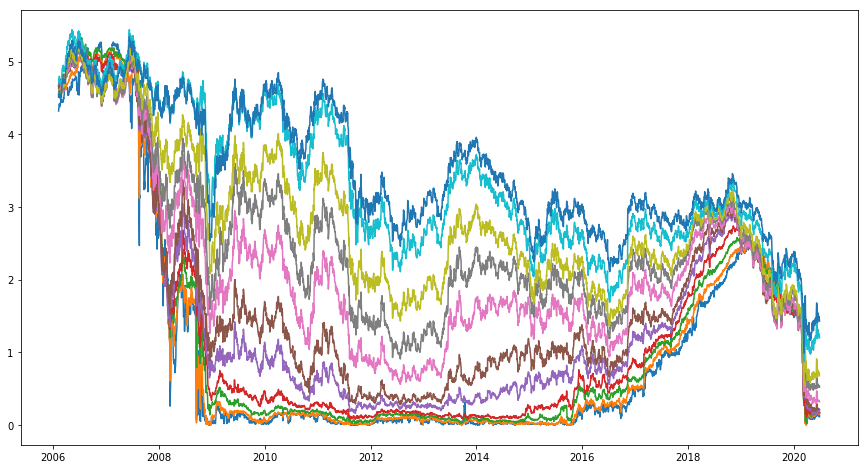

In [17]:
# view the yield curve
plt.figure(figsize=(15,8))
plt.plot(df)
plt.show()

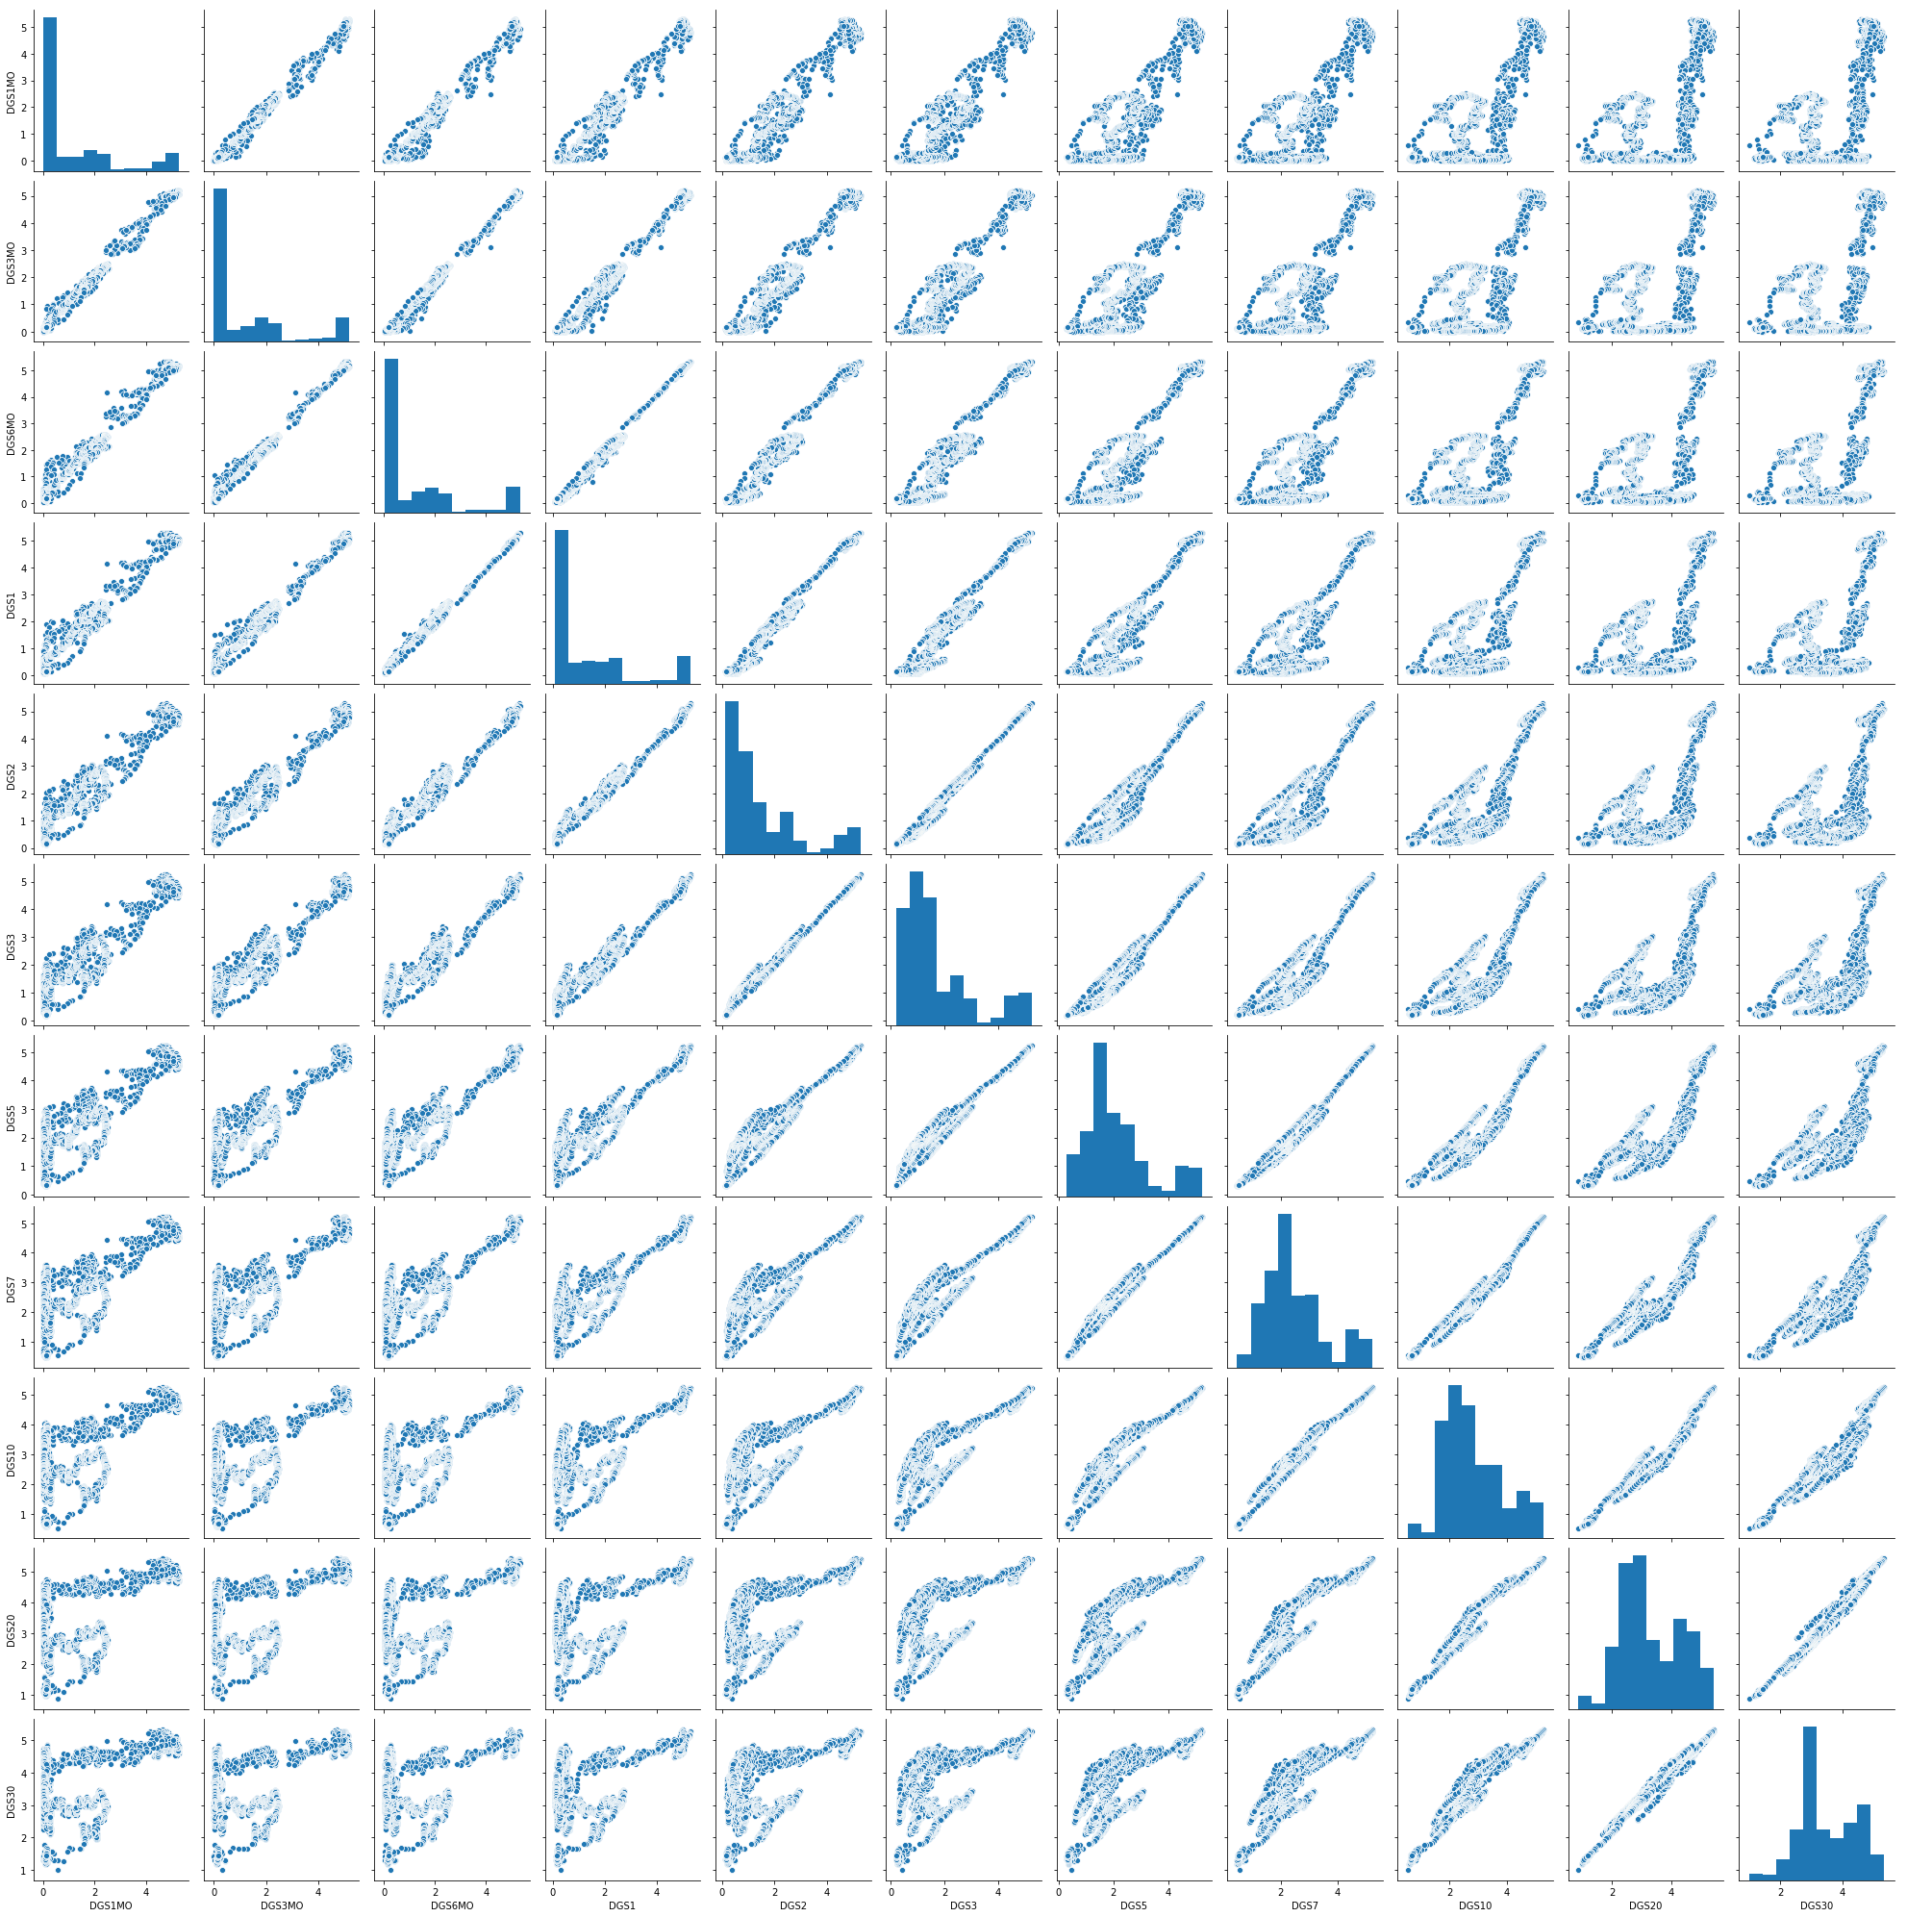

In [20]:
# correlation among tenors
sns.pairplot(df)

In [22]:
# covariance
df.cov()

,DGS1MO,DGS3MO,DGS6MO,DGS1,DGS2,DGS3,DGS5,DGS7,DGS10,DGS20,DGS30
DGS1MO,2.455737,2.472240,2.489812,2.394200,2.150832,1.956444,1.610760,1.338575,1.113728,0.858490,0.677266
DGS3MO,2.472240,2.499624,2.522937,2.429956,2.187512,1.992079,1.643112,1.366893,1.138322,0.878093,0.691921
DGS6MO,2.489812,2.522937,2.556847,2.469030,2.229056,2.034033,1.683837,1.403984,1.172806,0.908948,0.714581
DGS1,2.394200,2.429956,2.469030,2.392911,2.170859,1.987637,1.652712,1.382147,1.156120,0.898241,0.705281
DGS2,2.150832,2.187512,2.229056,2.170859,1.995134,1.847208,1.563514,1.326081,1.120209,0.887359,0.703058
DGS3,1.956444,1.992079,2.034033,1.987637,1.847208,1.732272,1.499792,1.295638,1.112220,0.906643,0.727646
DGS5,1.610760,1.643112,1.683837,1.652712,1.563514,1.499792,1.364713,1.227769,1.099623,0.956898,0.791807
DGS7,1.338575,1.366893,1.403984,1.382147,1.326081,1.295638,1.227769,1.142977,1.060447,0.970380,0.820605
DGS10,1.113728,1.138322,1.172806,1.156120,1.120209,1.112220,1.099623,1.060447,1.028050,0.992879,0.855905
DGS20,0.858490,0.878093,0.908948,0.898241,0.887359,0.906643,0.956898,0.970380,0.992879,1.025338,0.898955


In [23]:
# correlation
df.corr()

,DGS1MO,DGS3MO,DGS6MO,DGS1,DGS2,DGS3,DGS5,DGS7,DGS10,DGS20,DGS30
DGS1MO,1.000000,0.997843,0.993627,0.987657,0.971694,0.948568,0.879872,0.798974,0.700940,0.541017,0.481745
DGS3MO,0.997843,1.000000,0.997968,0.993568,0.979551,0.957329,0.889630,0.808683,0.710102,0.548491,0.487830
DGS6MO,0.993627,0.997968,1.000000,0.998184,0.986922,0.966491,0.901420,0.821280,0.723381,0.561375,0.498137
DGS1,0.987657,0.993568,0.998184,1.000000,0.993533,0.976261,0.914562,0.835742,0.737111,0.573451,0.508216
DGS2,0.971694,0.979551,0.986922,0.993533,1.000000,0.993623,0.947535,0.878143,0.782178,0.620412,0.554823
DGS3,0.948568,0.957329,0.966491,0.976261,0.993623,1.000000,0.975444,0.920782,0.833442,0.680291,0.616256
DGS5,0.879872,0.889630,0.901420,0.914562,0.947535,0.975444,1.000000,0.983054,0.928359,0.808931,0.755523
DGS7,0.798974,0.808683,0.821280,0.835742,0.878143,0.920782,0.983054,1.000000,0.978280,0.896374,0.855588
DGS10,0.700940,0.710102,0.723381,0.737111,0.782178,0.833442,0.928359,0.978280,1.000000,0.967065,0.940952
DGS20,0.541017,0.548491,0.561375,0.573451,0.620412,0.680291,0.808931,0.896374,0.967065,1.000000,0.989587


In [24]:
# perform PCA
from sklearn.decomposition import PCA
pca = PCA().fit(df)        # call fit or fit_transform

In [36]:
print(pca.explained_variance_ratio_)
print(np.cumsum(pca.explained_variance_ratio_))

[8.91029733e-01 9.83821793e-02 8.47790209e-03 1.27389376e-03
 3.17214670e-04 2.85549859e-04 1.12022889e-04 4.99188552e-05
 3.26107231e-05 2.07690296e-05 1.82060356e-05]
[0.89102973 0.98941191 0.99788981 0.99916371 0.99948092 0.99976647
 0.9998785  0.99992841 0.99996102 0.99998179 1.        ]


Text(0, 0.5, 'cumulative explained variance')

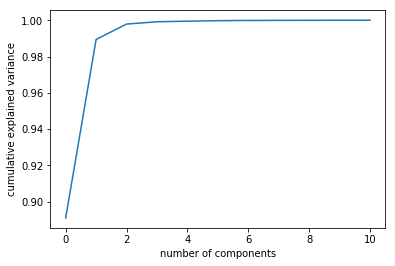

In [101]:
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

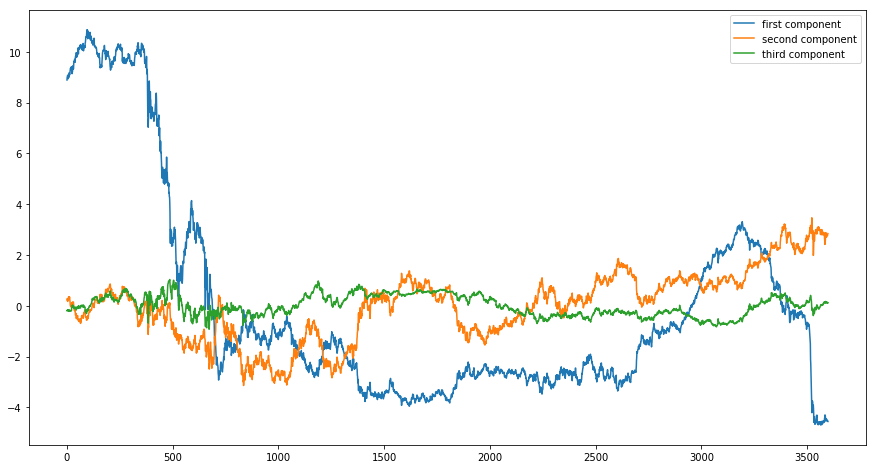

In [46]:
df_pca = pca.transform(df)            # eigenvector
plt.figure(figsize=(15,8))
plt.plot(df_pca[:, 0], label='first component')
plt.plot(df_pca[:, 1], label='second component')
plt.plot(df_pca[:, 2], label='third component')
plt.legend()
plt.show()

In [ ]:
# optional: more information
print(pca.singular_values_.shape)        # SVD
print(pca.get_covariance().shape)       # covariance
print(pca.components_.shape)         # l*p, W^T

In [44]:
# optional: call fit_transform directly
df_pca_123 = PCA(n_components=3).fit_transform(df)     
df_pca_123 = pd.DataFrame(data = df_pca_123, columns = ['first component', 'second component', 'third component'])
print(df_pca_123.shape)

(3599, 3)


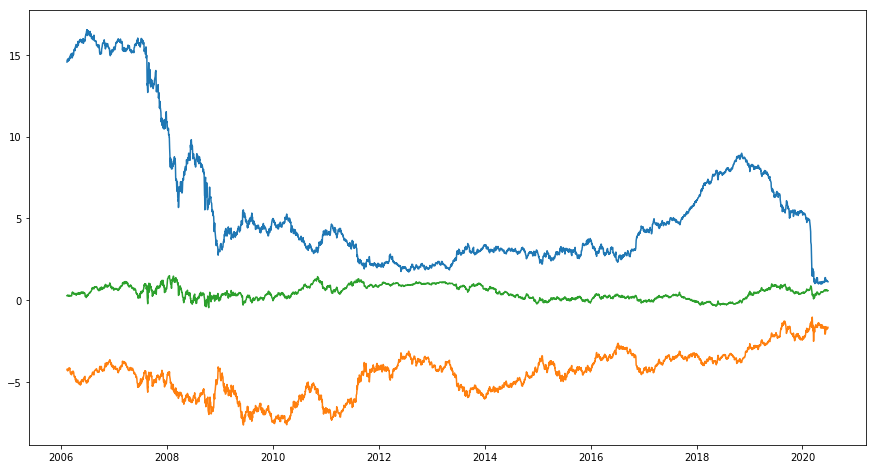

In [92]:
# optional: transform
prin = np.matmul(df, pca.components_.T)        # T = X * W
plt.figure(figsize=(15,8))
plt.plot(prin.iloc[:, 0])       # first PCA
plt.plot(prin.iloc[:, 1])       # 2nd PCA
plt.plot(prin.iloc[:, 2])       # 2nd PCA

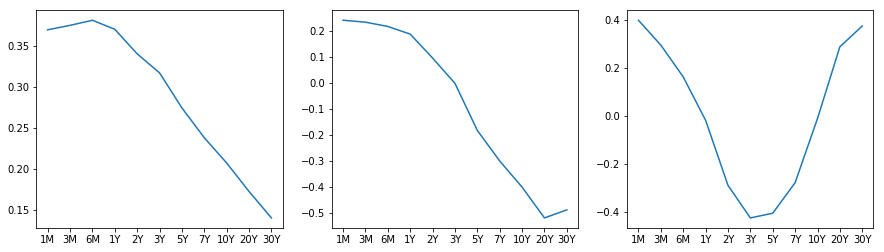

In [91]:
# exposures
tenors_label = ['1M', '3M', '6M', '1Y', '2Y', '3Y', '5Y', '7Y', '10Y', '20Y', '30Y']
plt.figure(figsize=(15,4))
plt.subplot(131)
plt.plot(tenors_label, pca.components_[0, :])
plt.subplot(132)
plt.plot(tenors_label, pca.components_[1, :])
plt.subplot(133)
plt.plot(tenors_label, pca.components_[2, :])

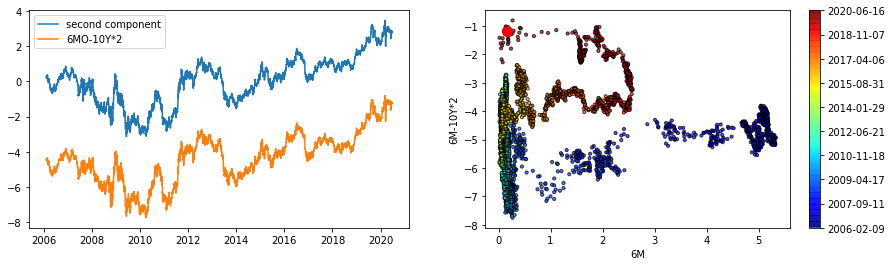

In [104]:
# Is 6M-10Y*2 close to second PCA?
plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(df.index, df_pca[:, 1], label='second component')
plt.plot(df['DGS6MO']-df['DGS10']*2, label='6MO-10Y*2')               # buy double duration neutral
plt.legend()
plt.subplot(122)
cm = plt.get_cmap('jet')
colors = np.linspace(0.1, 1, df.shape[0])
sc = plt.scatter(df['DGS6MO'], df['DGS6MO'] - df['DGS10']*2, s=10, c=colors, cmap=cm, edgecolors='k', alpha=0.7)
cb = plt.colorbar(sc)
cb.ax.set_yticklabels(str(p.date()) for p in df[::df.shape[0]//9].index)
plt.xlabel('6M')
plt.ylabel('6M-10Y*2')
plt.scatter(df['DGS6MO'].iloc[-1], (df['DGS6MO'] - df['DGS10']*2).iloc[-1], s=100, c='r')
plt.show()